# Solution Implementation by Srinivas Cheemalapati

# CS 109A/AC 209A/STAT 121A Data Science: Lab 0
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [1]:
import numpy as np
from io import BytesIO

import matplotlib
import matplotlib.pyplot as plt
import random

from mpl_toolkits.mplot3d import Axes3D

from bs4 import BeautifulSoup
import urllib.request
%matplotlib inline

## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file $\mathtt{dataset}$\_$\mathtt{HW0.txt}$, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

<b>Prettify your output</b>, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

In [2]:
#create a variable for the file dataset_HW0.txt
fname = 'dataset_HW0.txt'


In [3]:
#fname

In [4]:
# Option 1: Open the file and load the data into the numpy array; skip the headers

with open(fname) as f:
    lines = (line for line in f if not line.startswith('#'))
    data = np.loadtxt(lines, delimiter=',', skiprows=1)

In [5]:
# What is the shape of the data
data.shape

(400, 3)

In [6]:
#Option 2: Open the file and load the data into the numpy array; skip the headers

data = np.loadtxt('dataset_HW0.txt', delimiter=',', skiprows=1)
data.shape

(400, 3)

In [7]:
# print the first 3 rows of the data
data[0:3]

array([[  2.9694893 ,   1.97915605,  16.        ],
       [  4.03896294,   3.5556812 ,  16.        ],
       [  5.30264328,   3.3856329 ,  15.        ]])

In [8]:
#data[:,0]

(array([  6.,  15.,  25.,  50.,  84.,  89.,  74.,  36.,  15.,   6.]),
 array([ 2.96742563,  3.57287726,  4.17832889,  4.78378052,  5.38923215,
         5.99468379,  6.60013542,  7.20558705,  7.81103868,  8.41649031,
         9.02194195]),
 <a list of 10 Patch objects>)

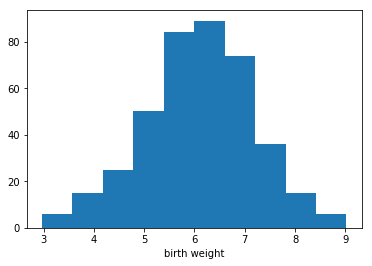

In [9]:
# show the range of values for birth weight
fig = plt.figure()
axes = fig.add_subplot(111)
plt.xlabel("birth weight")
axes.hist(data[:,0])

(array([   1.,    3.,   10.,   44.,   90.,  114.,   89.,   39.,    7.,    3.]),
 array([ 0.47915417,  1.09611176,  1.71306935,  2.33002694,  2.94698453,
         3.56394212,  4.18089971,  4.7978573 ,  5.41481489,  6.03177248,
         6.64873007]),
 <a list of 10 Patch objects>)

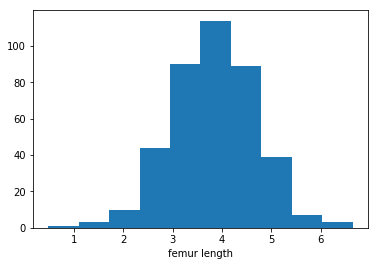

In [10]:
# show the range of values for the femur length
fig = plt.figure()
axes = fig.add_subplot(111)
plt.xlabel("femur length")
axes.hist(data[:,1])

### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

In [11]:
#calculate the overall means
birth_weight_mean = data[:,0].mean()
birth_weight_mean

6.1040701728626008

In [12]:
#calculagte the overall mean for Femur Length
femur_length_mean = data[:,1].mean()
femur_length_mean

3.8275908315378775

In [13]:
# Capture the birth weight
birth_weight = data[:,0]

#Capture the Femur length
femur_length = data[:,1]

# Capture the maternal age
maternal_age = data[:,2]

maternal_age.shape

# Create indexes for the different maternal age groups

#group_1 
group_1 = maternal_age <= 17

#group_2
group_2 = [(maternal_age >= 18) & (maternal_age <= 34)]

#group_3
group_3 = [(maternal_age >= 35) & (maternal_age <= 50)]



In [14]:
bw_g1 = data[:, 0][group_1]
age0_17 = data[:, 2][group_1]
bw_g1.mean()

5.1688997991177992

In [15]:
fl_g1 = data[:, 1][group_1]
fl_g1.mean()

3.5068064085253097

In [16]:
bw_g2 = data[:, 0][group_2]
age18_34 = data[:, 2][group_2]
bw_g2.mean()

6.7053636369478999

In [17]:
fl_g2 = data[:, 1][group_2]
fl_g2.mean()

4.0043330550952998

In [18]:
bw_g3    = data[:, 0][group_3]
age35_50 = data[:, 2][group_3]
bw_g3.mean()

5.8366536184368014

In [19]:
fl_g3 = data[:, 1][group_3]
fl_g3.mean()

3.7948908074356007

### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot (label the axes and title your plot). How does your visual analysis compare with the stats you've computed in Part (b)?

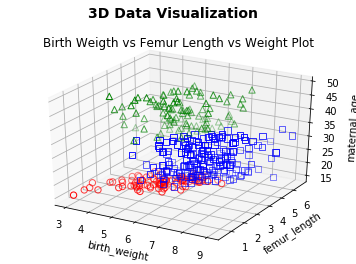

In [20]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, m in [('r', 'o')]:
    ax.scatter(bw_g1, fl_g1, age0_17, edgecolor=c,facecolors=(0,0,0,0), marker=m, s=40)
for c, m in [('b', 's')]:
    ax.scatter(bw_g2, fl_g2, age18_34, edgecolor=c,facecolors=(0,0,0,0), marker=m, s=40)    
for c, m in [('g', '^')]:
    ax.scatter(bw_g3, fl_g3, age35_50, edgecolor=c,facecolors=(0,0,0,0), marker=m, s=40)  
    

fig.suptitle('3D Data Visualization', fontsize=14, fontweight='bold')

ax.set_title('Birth Weigth vs Femur Length vs Weight Plot')
ax.set_xlabel('birth_weight')
ax.set_ylabel('femur_length')
ax.set_zlabel('maternal_age')

plt.show()

### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

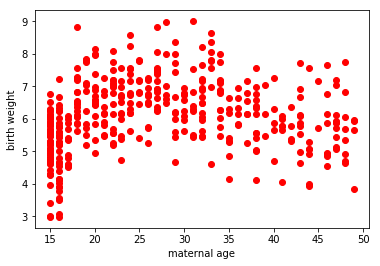

In [21]:
plt.scatter(maternal_age,birth_weight, color='r', marker='o')
plt.xlabel("maternal age")
plt.ylabel("birth weight")
plt.show()

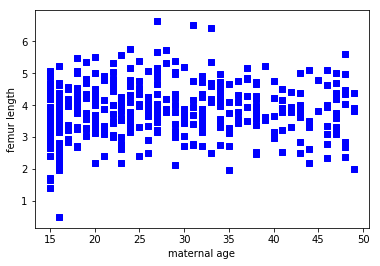

In [22]:
plt.scatter(maternal_age,femur_length, color='b', marker='s')
plt.xlabel("maternal age")
plt.ylabel("femur length")
plt.show()

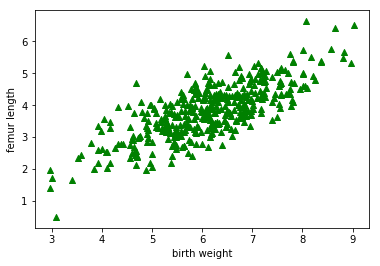

In [23]:
plt.scatter(birth_weight,femur_length, color='g', marker='^')
plt.xlabel("birth weight")
plt.ylabel("femur length")
plt.show()

## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 

$\mathtt{http://www.gutenberg.org/files/5200/5200-h/5200-h.htm}$

into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the $\mathtt{prettify()}$ function.

In [24]:
# load the file into a beautifulsoup object
page = urllib.request.urlopen("http://www.gutenberg.org/files/5200/5200-h/5200-h.htm").read()

In [25]:
# prettify the data read from the url and print the first 1000 characters
soup = BeautifulSoup(page, "html.parser")

print(soup.prettify()[0:1000])

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Metamorphosis by Franz Kafka
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body>
  <pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK ME


### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the string inside the head tag
3. each child of the head tag
2. the string inside the title tag
3. the string inside the preformatted text (pre) tag
4. the string inside the first paragraph (p) tag

Make your output readable.

In [26]:
# print the content of the head tag
soup.head

<head>
<title>Metamorphosis by Franz Kafka</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
</head>

In [27]:
# print the string inside the head tag
soup.head.title

<title>Metamorphosis by Franz Kafka</title>

In [28]:
# print each child of the head tag
soup.head.meta

<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>

In [29]:
# print the string inside the title tag
soup.head.title.string

'Metamorphosis by Franz Kafka'

In [30]:
# print the string inside the pre-formatbted text (pre) tag
print(soup.body.pre.string)



The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.





In [31]:
# print the string inside first paragraph (p) tag
print(soup.body.p.string)

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked.


### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the $\mathtt{get}$_$\mathtt{text()}$ function. 

Print the first and last 1000 characters of the text returned by $\mathtt{get}$_$\mathtt{text()}$. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

In [32]:
print(soup.get_text()[1:1000])



Metamorphosis by Franz Kafka





The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.




  Metamorphosis
  Franz Kafka
Translated by David Wyllie
I
One morning, when Gregor Samsa woke from troubled dreams, h


### Part (d): Extracting Text (Continued)

Using the $\mathtt{find}$_$\mathtt{all()}$ function, extract the text of The Metamorphosis and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

In [33]:
p = soup.find_all('p')

combined_text = ''

for node in soup.findAll('p'):
   combined_text += "".join(node.findAll(text=True))

print(combined_text[0:1000])


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked."What's happened to me?" he thought.  It wasn't a dream.  His room,
a proper human room although a little too small, lay peacefully
between its four familiar walls.  A collection of textile samples
lay spread out on the table - Samsa was a travelling salesman - and
above it there hung a picture that he had recently cut out of an
illustrated magazine and housed in a nice, gilded frame.  It showed
a lady fitted out with a fur hat and fur boa who sat upright,
raising a heavy fur muff that covered the whole of her


### Part (e): Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

You'll need to adjust the number of bins for each histogram.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

In [35]:
word_list = combined_text.lower().replace(':','').replace('.','').replace(',', '').replace('"','').replace('!','').replace('?','').replace(';','').split()
#print(word_list[0:100])


word_length = [len(n) for n in word_list]
print(word_length[0:100])

total_word_length = sum(word_length)
print("The total word length: ", total_word_length)

wordcount  = len(word_list)
print("The total number of words: ", wordcount)

avg_word_length = total_word_length / wordcount
print("The average word length is: ", avg_word_length)



# function to calculate the number of uniques words
# wordcount = {}
# for word in word_list:
#    if word not in wordcount:
#        wordcount[word] = 1
#    else:
#        wordcount[word] += 1

# for k,v in wordcount.items():    
#    print (len(k), v)


[3, 7, 4, 6, 5, 4, 4, 8, 6, 2, 5, 7, 11, 2, 3, 3, 4, 1, 8, 6, 2, 3, 2, 3, 11, 4, 3, 2, 2, 6, 3, 4, 1, 6, 2, 5, 3, 3, 5, 5, 8, 5, 3, 7, 2, 6, 4, 5, 8, 3, 7, 3, 6, 4, 2, 5, 2, 3, 6, 5, 2, 5, 3, 3, 6, 3, 4, 4, 9, 4, 8, 4, 3, 4, 2, 3, 4, 2, 3, 5, 5, 10, 2, 2, 12, 8, 2, 2, 2, 7, 2, 6, 1, 5, 3, 4, 1, 6, 5, 4]
The total word length:  93788
The total number of words:  21990
The average word length is:  4.265029558890404


(array([  4.19000000e+02,   3.79400000e+03,   5.56800000e+03,
          4.39300000e+03,   2.55800000e+03,   2.04300000e+03,
          1.35200000e+03,   8.26000000e+02,   4.81000000e+02,
          2.95000000e+02,   1.31000000e+02,   7.10000000e+01,
          3.40000000e+01,   1.60000000e+01,   3.00000000e+00,
          1.00000000e+00,   5.00000000e+00]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <a list of 17 Patch objects>)

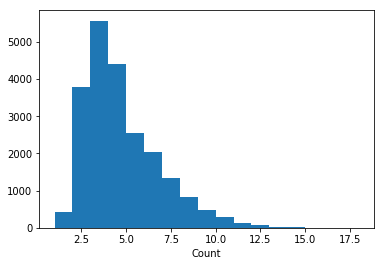

In [40]:
# Print the histogram for the word lengths
fig = plt.figure()
axes = fig.add_subplot(111)

plt.xlabel("Word Lengths")
plt.xlabel("Count")

#axes.hist(word_length)
plt.hist(word_length, bins=np.arange(min(word_length), max(word_length) + 1, 1))

## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 6 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the $\mathtt{uniform()}$ function from the $\mathtt{random}$ library.